In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
df=pd.read_csv('C:/Users/debap/Downloads/final_dataset.csv')

In [3]:
#view first five rows of the dataset
df.head()

,Unnamed: 0,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
0,0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,NaN
1,1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,NaN
2,2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,10.0
3,3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,9.0
4,4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,2.0


In [4]:
#EDA
#number of rows and columns in the data
df.shape

(32, 13)

In [5]:
#identify the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      32 non-null     int64  
 1   State Name                      32 non-null     object 
 2   Two Wheeler                     32 non-null     int64  
 3   Three Wheeler                   32 non-null     float64
 4   Four Wheeler                    32 non-null     int64  
 5   Goods Vehicles                  32 non-null     float64
 6   Public Service Vehicle          32 non-null     float64
 7   Special Category Vehicles       32 non-null     float64
 8   Ambulance/Hearses               32 non-null     float64
 9   Construction Equipment Vehicle  32 non-null     float64
 10  Other                           32 non-null     float64
 11  Grand Total                     32 non-null     int64  
 12  total-charging-stations         24 non

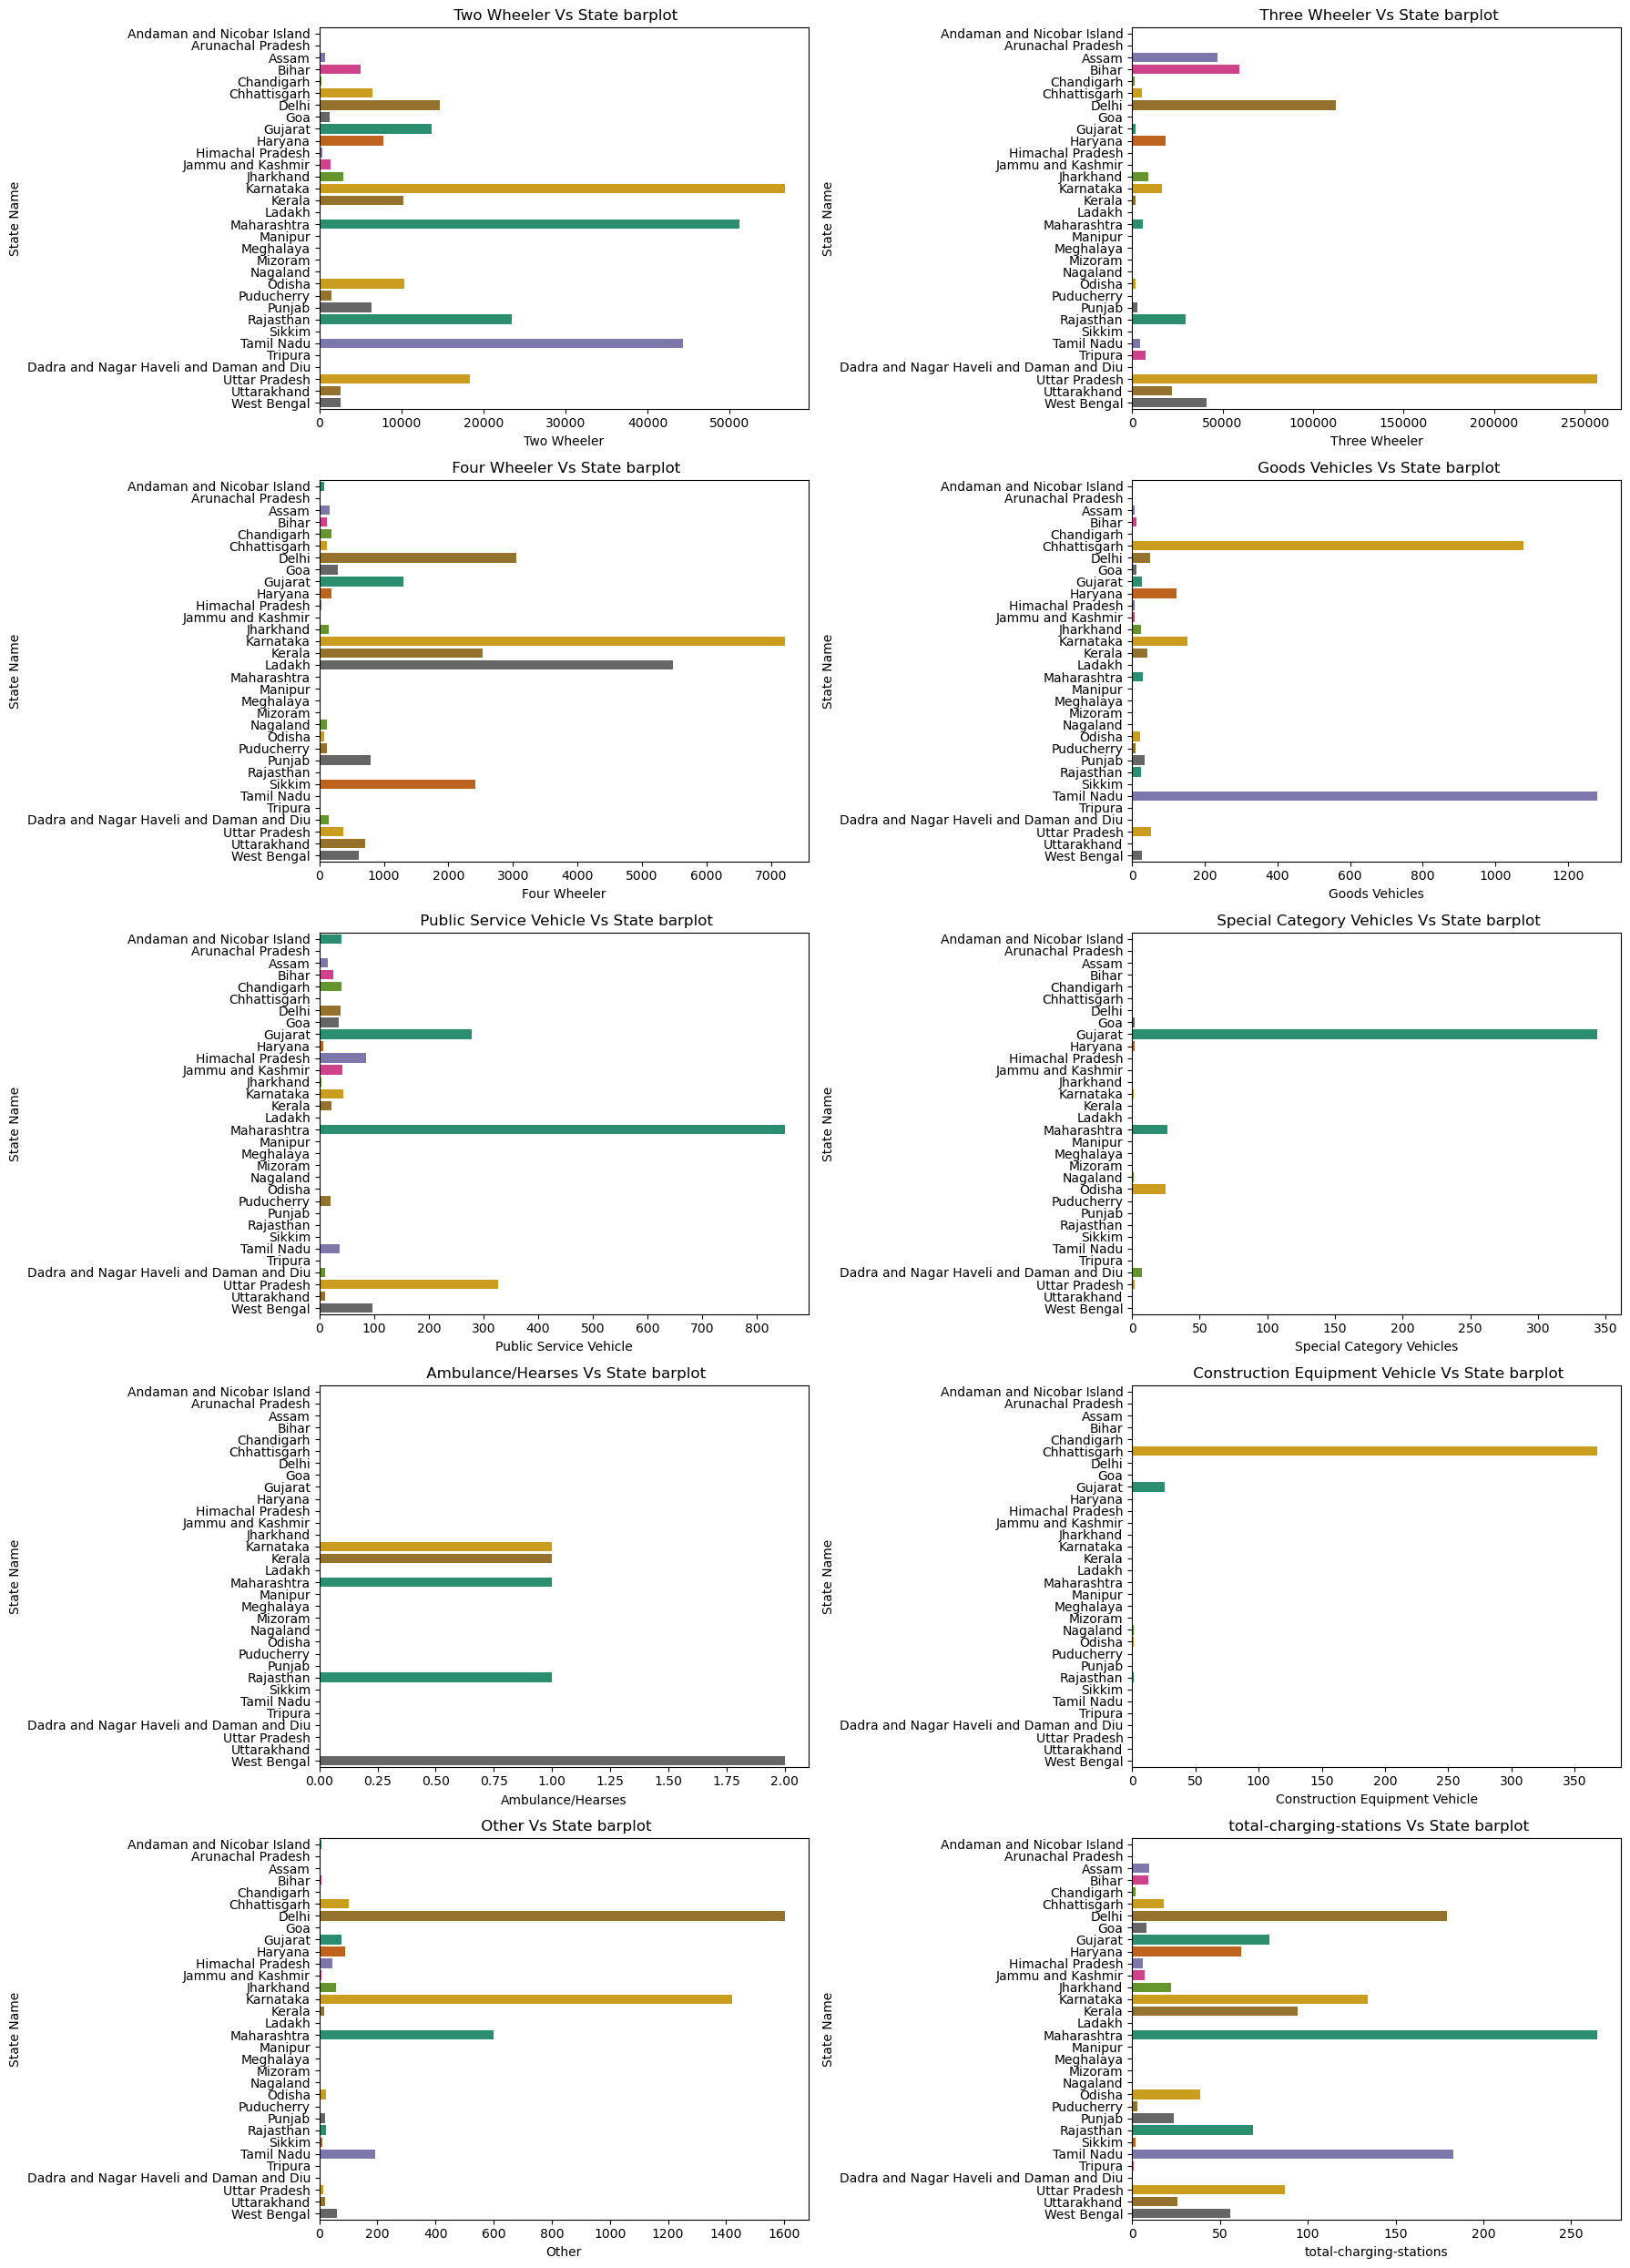

In [6]:
# visualize data

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(18,25))
axs=axs.flatten()
columns_plot = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 'Public Service Vehicle','Special Category Vehicles', 'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other', 'total-charging-stations']
# Loop through the columns and create a plot for each
for i, col in enumerate(columns_plot):
    sns.barplot(data=df,x=col, y='State Name',palette='Dark2', ax=axs[i])
    axs[i].set_title(f' {col} Vs State barplot')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('State Name')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
#checking for missing values
df.isnull().sum()

Unnamed: 0                        0
State Name                        0
Two Wheeler                       0
Three Wheeler                     0
Four Wheeler                      0
Goods Vehicles                    0
Public Service Vehicle            0
Special Category Vehicles         0
Ambulance/Hearses                 0
Construction Equipment Vehicle    0
Other                             0
Grand Total                       0
total-charging-stations           8
dtype: int64

In [8]:
#filling the missing values with the median
df=df.fillna(df.median())
#Summary statistics
df.describe()

,Unnamed: 0,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
count,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,15.500000,8829.437500,20224.562500,822.96875,94.875000,63.718750,12.81250,0.187500,12.406250,137.875000,30198.843750,49.500000
std,9.380832,15027.420445,49311.798762,1661.50339,287.596912,161.503467,60.76047,0.470929,65.050283,377.119879,54220.859227,61.817108
min,0.000000,1.000000,0.000000,2.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,20.000000,1.000000
25%,7.750000,68.500000,31.500000,13.75000,1.750000,0.750000,0.00000,0.000000,0.000000,1.000000,1323.000000,9.750000
50%,15.500000,1984.500000,1992.000000,131.50000,10.000000,12.500000,0.00000,0.000000,0.000000,11.000000,11156.500000,25.000000
75%,23.250000,10306.500000,17007.250000,638.50000,31.250000,40.000000,1.00000,0.000000,0.000000,58.000000,45205.000000,63.750000
max,31.000000,56737.000000,257159.000000,7212.00000,1281.000000,851.000000,344.00000,2.000000,368.000000,1602.000000,276217.000000,265.000000


In [9]:
# creating a dataframe with the required columns from the actual dataframe
ev=df.drop(columns=['Unnamed: 0','State Name'])
ev.head()

,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
0,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,25.0
1,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,25.0
2,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,10.0
3,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,9.0
4,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,2.0


In [10]:
#features for segmentation
feature=ev.iloc[:,[0,1,2,3,4,5,6,7,8,10]] 
feature.head()

,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,total-charging-stations
0,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,25.0
1,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,25.0
2,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,10.0
3,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,9.0
4,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,2.0


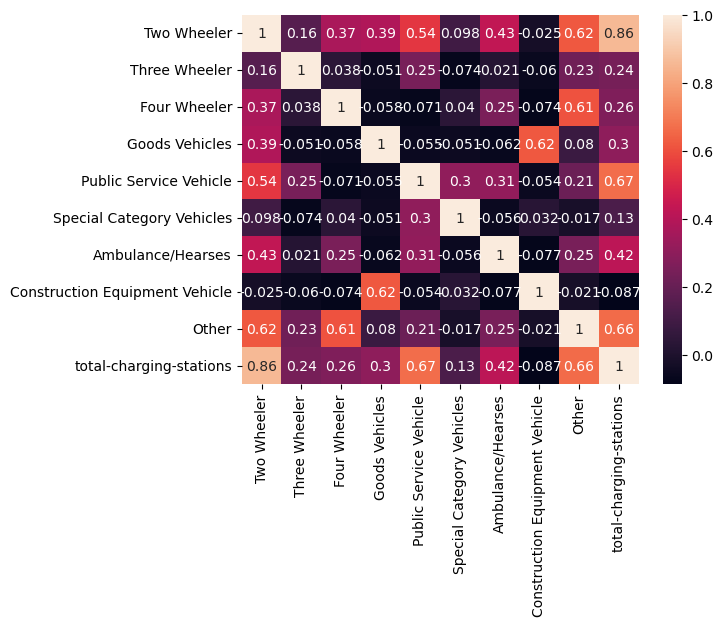

In [11]:
# check for correlation
ax=sns.heatmap(feature.corr(),annot=True)

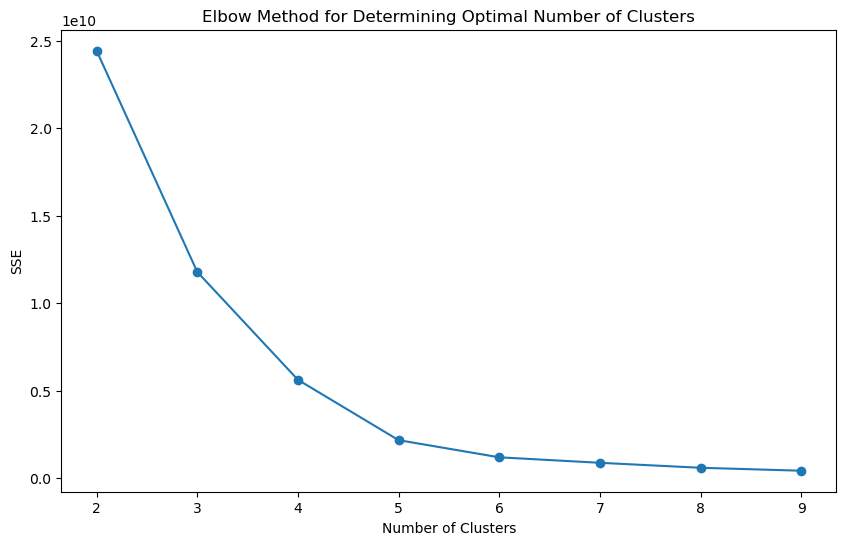

In [12]:
# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feature)
    sse.append(kmeans.inertia_)
# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), sse, marker='o')
plt.xticks(range(2, 10))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()
# Fit the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(feature)

# Add cluster labels to the data
ev['KMeans_Cluster'] = kmeans_labels

Explained variance ratio: [9.42221512e-01 5.71851305e-02 5.61308957e-04 1.55212943e-05
 1.22348120e-05 3.30759361e-06 5.74065668e-07 3.50692836e-07
 6.02429736e-08 3.45847353e-11 1.06322884e-11 1.47469516e-34]
Singular values: [4.04451963e+05 9.96396052e+04 9.87168812e+03 1.64155110e+03
 1.45743465e+03 7.57785886e+02 3.15697561e+02 2.46748140e+02
 1.02268913e+02 2.45037565e+00 1.35863818e+00 5.05989573e-12]
PCA components:
 [[ 6.8e-02  6.7e-01  2.7e-03  7.3e-05  7.3e-04 -4.4e-05  6.3e-07 -5.4e-05
   1.7e-03  7.4e-01  3.3e-04  6.0e-07]
 [ 7.9e-01 -4.9e-01  3.6e-02  6.4e-03  4.1e-03  4.2e-04  1.1e-05 -8.2e-06
   1.2e-02  3.7e-01  2.7e-03  1.8e-06]
 [-3.3e-01 -2.7e-01  8.5e-01 -3.4e-02 -2.8e-02  1.7e-04  1.8e-05 -1.3e-03
   8.8e-02  2.7e-01 -2.7e-03 -2.9e-05]
 [-2.7e-01 -2.5e-01 -2.6e-01  7.9e-01 -1.5e-01 -1.6e-02 -4.1e-04  1.6e-01
   2.6e-01  2.5e-01  1.3e-02 -2.4e-04]
 [-1.0e-01 -9.6e-02 -2.0e-01 -4.2e-01  9.9e-02 -6.6e-04  2.1e-05 -4.1e-02
   8.6e-01  9.5e-02  5.4e-02 -6.3e-04]
 [-2.3e

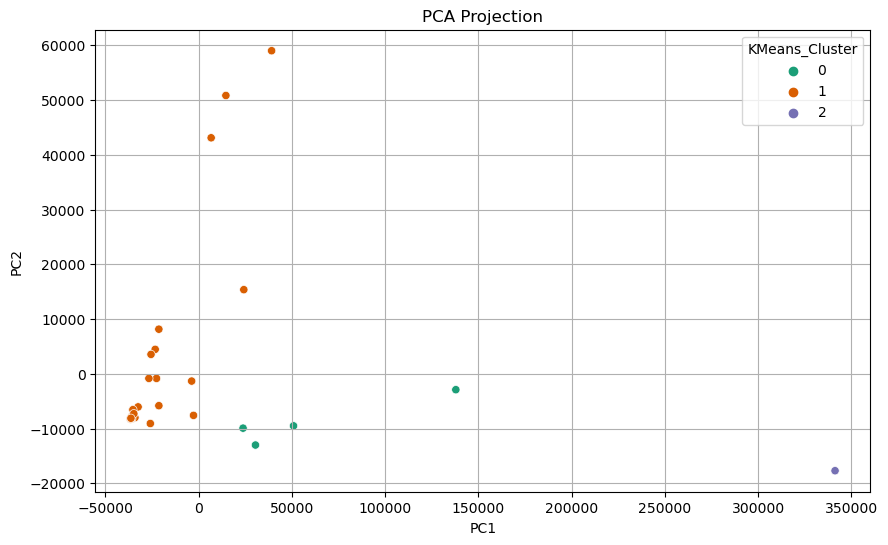

In [13]:
#PCA
pca=PCA()
pca_components=pca.fit_transform(ev)
print("Explained variance ratio:",pca.explained_variance_ratio_)
print("Singular values:",pca.singular_values_)
np.set_printoptions(precision=1)
print("PCA components:\n",pca.components_)
# plot PCA
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_components[:,0],y=pca_components[:,1],hue=ev['KMeans_Cluster'],palette='Dark2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.grid(True)
plt.show()

In [14]:
score=silhouette_score(ev,kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.5905141826993069


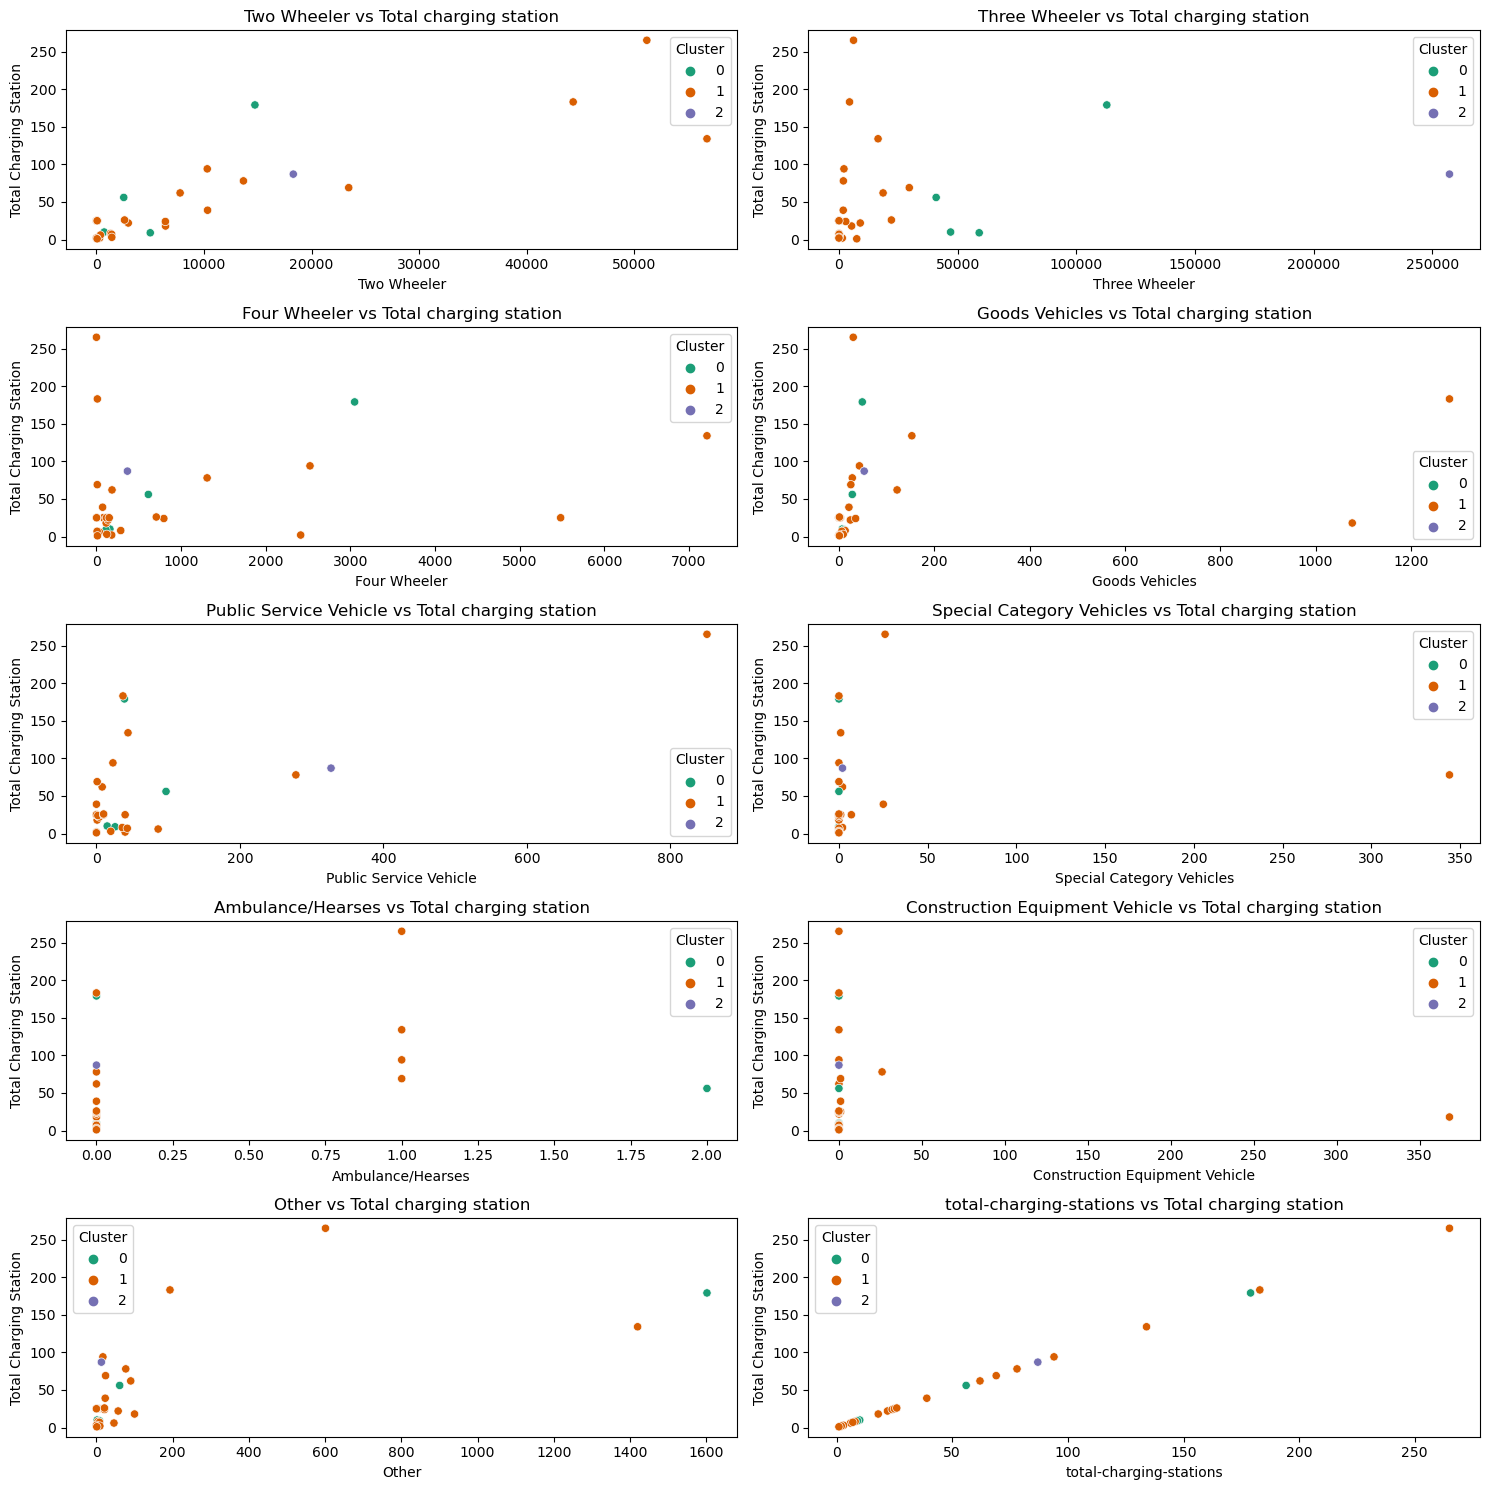

In [15]:
# visualization of the clusters
# Number of subplots
num_plots = len(feature)

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,15))
axs=axs.flatten()

# Loop through the columns and create a plot for each
for i, col in enumerate(feature):
    sns.scatterplot(data=ev,x=col,y='total-charging-stations',hue='KMeans_Cluster',palette='Dark2',ax=axs[i])
    axs[i].set_title(f'{col} vs Total charging station')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Total Charging Station')
    axs[i].legend(title='Cluster')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
# Group data by KMeans_Cluster and calculate mean values
cluster_profiles = ev.groupby('KMeans_Cluster').mean()
cluster_profiles

,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations
KMeans_Cluster,,,,,,,,,,,
0,5748.500000,64974.750000,985.250000,23.750000,44.250000,0.000000,0.500000,0.000000,418.250000,72195.25000,63.500000
1,8935.296296,4819.555556,815.777778,106.962963,56.851852,15.111111,0.148148,14.703704,100.962963,14865.37037,46.037037
2,18295.000000,257159.000000,368.000000,53.000000,327.000000,2.000000,0.000000,0.000000,13.000000,276217.00000,87.000000


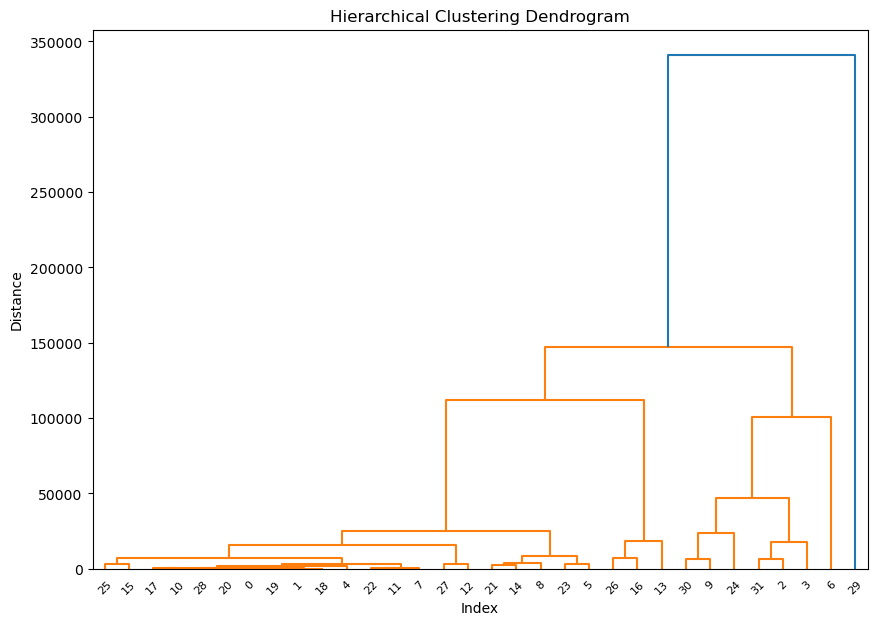

In [17]:
# Perform hierarchical/agglomerative clustering
linked = linkage(feature,method='ward')
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=ev.index.values, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [18]:
ev.head()

,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total,total-charging-stations,KMeans_Cluster
0,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159,25.0,1
1,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20,25.0,1
2,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947,10.0,0
3,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241,9.0,0
4,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931,2.0,1
